In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import math

In [46]:
df = pd.read_csv('cleaned_weather.csv')
df.head()

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81


In [47]:
df.shape

(52696, 21)

In [48]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [49]:
df.head()

,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
date,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81


In [50]:
df.isnull().sum()

p           0
T           0
Tpot        0
Tdew        0
rh          0
VPmax       0
VPact       0
VPdef       0
sh          0
H2OC        0
rho         0
wv          0
max. wv     0
wd          0
rain        0
raining     0
SWDR        0
PAR         0
max. PAR    0
Tlog        0
dtype: int64

In [51]:
df = df.select_dtypes(include=[np.number])


In [52]:
print("\nSkewness before transformation:")
for col in df.columns:
    print(f"{col}: {skew(df[col]):.2f}")


Skewness before transformation:
p: -0.40
T: 0.33
Tpot: 0.27
Tdew: 0.04
rh: -0.45
VPmax: 1.33
VPact: 0.81
VPdef: 2.09
sh: 0.81
H2OC: 0.81
rho: 0.07
wv: -229.08
max. wv: 1.37
wd: -0.51
rain: 34.93
raining: 4.44
SWDR: 1.83
PAR: 1.83
max. PAR: -2.00
Tlog: 0.51


In [53]:
for col in df.columns:
    if abs(skew(df[col])) > 1:
        df[col] = np.log1p(df[col] - df[col].min() + 1)

In [54]:
print("\nSkewness after transformation:")
for col in df.columns:
    print(f"{col}: {skew(df[col]):.2f}")


Skewness after transformation:
p: -0.40
T: 0.33
Tpot: 0.27
Tdew: 0.04
rh: -0.45
VPmax: 0.03
VPact: 0.81
VPdef: 0.54
sh: 0.81
H2OC: 0.81
rho: 0.07
wv: -229.54
max. wv: 0.38
wd: -0.51
rain: 16.81
raining: 3.70
SWDR: 0.36
PAR: 0.26
max. PAR: -38.62
Tlog: 0.51


In [55]:
pt = PowerTransformer(method='yeo-johnson')


In [56]:
for col in df.columns:
    col_skew = skew(df[col])

    if abs(col_skew) > 20:
        df[col] = np.sign(df[col]) * np.log1p(np.abs(df[col]))
    elif abs(col_skew) > 5:
        df[col] = np.cbrt(df[col])
    elif abs(col_skew) > 1:
        df[[col]] = pt.fit_transform(df[[col]])
    else:
        df[col] = df[col]

In [57]:
print("\n✅ Skewness after improved transformation:")
for col in df.columns:
    print(f"{col}: {skew(df[col]):.2f}")


✅ Skewness after improved transformation:
p: -0.40
T: 0.33
Tpot: 0.27
Tdew: 0.04
rh: -0.45
VPmax: 0.03
VPact: 0.81
VPdef: 0.54
sh: 0.81
H2OC: 0.81
rho: 0.07
wv: -229.55
max. wv: 0.38
wd: -0.51
rain: 13.03
raining: 3.56
SWDR: 0.36
PAR: 0.26
max. PAR: -41.15
Tlog: 0.51


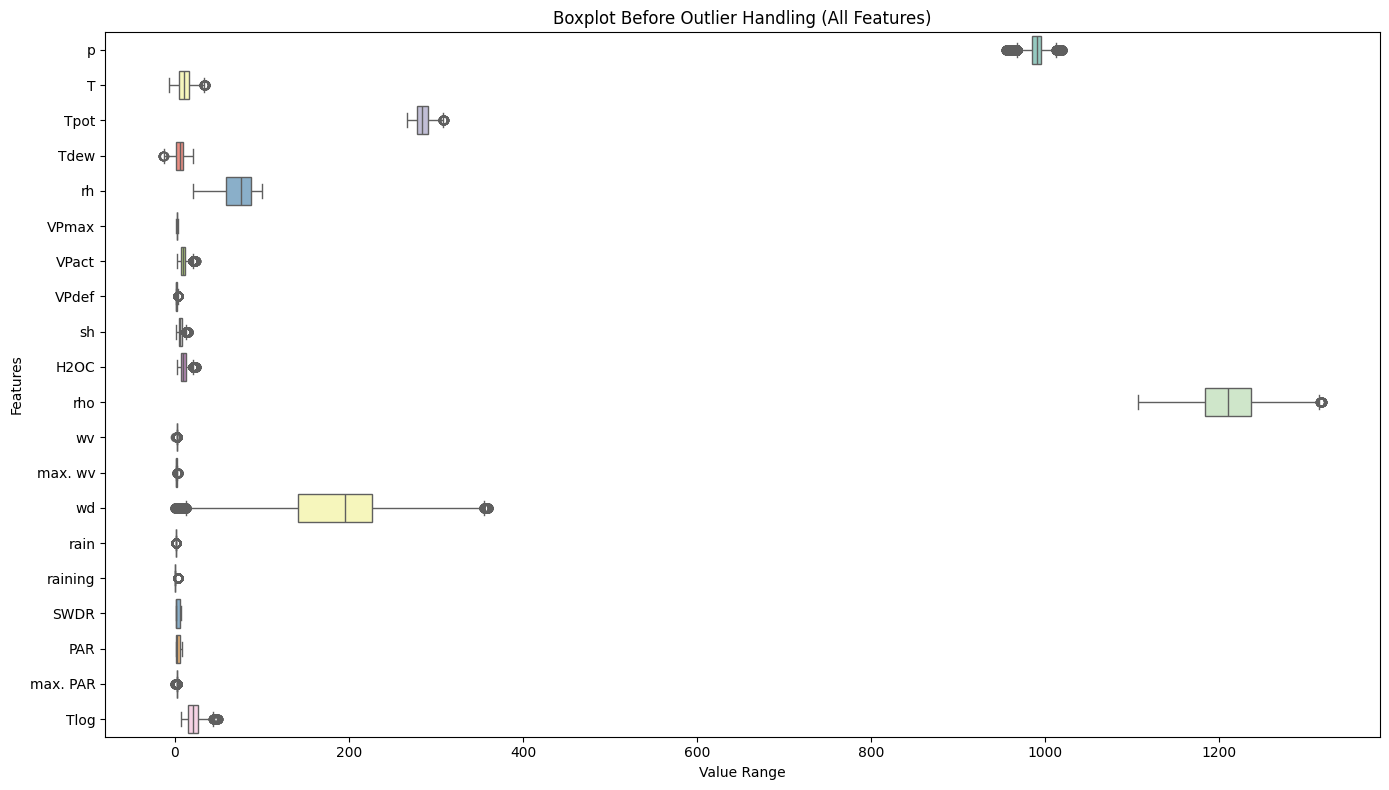

In [58]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, orient='h', palette='Set3')
plt.title('Boxplot Before Outlier Handling (All Features)')
plt.xlabel('Value Range')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [59]:
for col in df.columns:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)


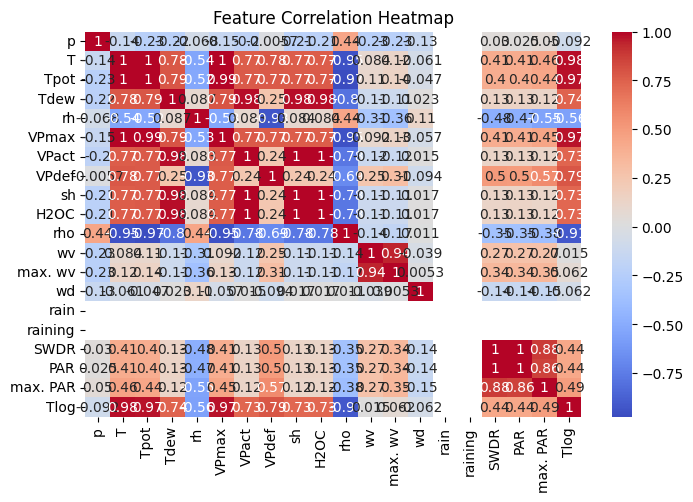

In [60]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [61]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

In [62]:
def create_sequences(data, target_col, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [63]:
seq_length = 30  # number of past time steps
target_col = df.columns[1]

In [64]:
X, y = create_sequences(df_scaled.values, target_col,seq_length)


In [65]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size, 0], y[train_size:, 0]

In [66]:
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [68]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 60s 41ms/step - loss: 0.0044 - val_loss: 2.2068e-04
Epoch 2/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - loss: 0.0013 - val_loss: 1.3716e-04
Epoch 3/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 71s 54ms/step - loss: 7.1036e-04 - val_loss: 1.7453e-04
Epoch 4/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 78s 59ms/step - loss: 5.3328e-04 - val_loss: 4.1068e-04
Epoch 5/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 72s 55ms/step - loss: 4.9538e-04 - val_loss: 9.5607e-05
Epoch 6/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 55s 42ms/step - loss: 4.8708e-04 - val_loss: 9.4007e-05
Epoch 7/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 56s 43ms/step - loss: 4.6231e-04 - val_loss: 7.9464e-05
Epoch 8/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 56s 43ms/step - loss: 4.5100e-04 - val_loss: 4.5972e-05
Epoch 9/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 61s 46ms/step - loss: 4.2897e-04 - val_loss: 1.1002e-04
Epoch 10/30
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 73s 56ms/step - loss: 4.2624e-04 - val_loss: 9.3709e-05
Epoch 11/30
1317/1317 ━━━━━

In [69]:
y_pred = model.predict(X_test)


330/330 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step


In [70]:
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [71]:
print("\n Model Accuracy Metrics:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


 Model Accuracy Metrics:
MAE  : 0.0033
RMSE : 0.0043
R²   : 0.9996


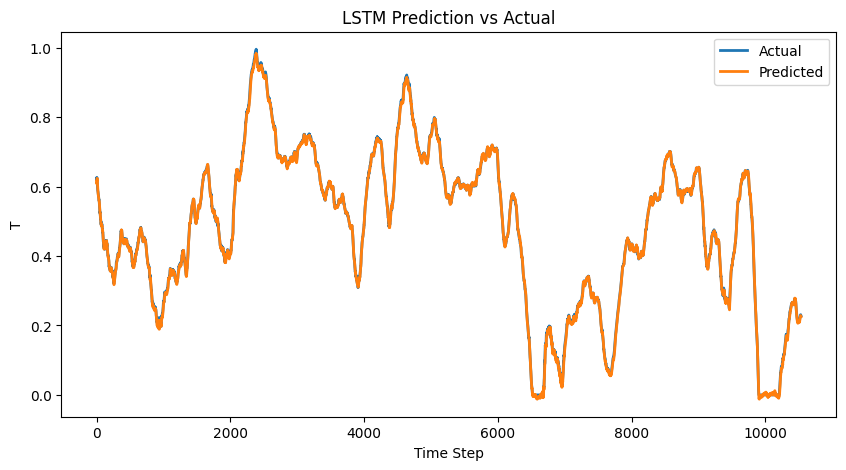

In [72]:
# Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual", linewidth=2)
plt.plot(y_pred, label="Predicted", linewidth=2)
plt.title("LSTM Prediction vs Actual")
plt.xlabel("Time Step")
plt.ylabel(target_col)
plt.legend()
plt.show()

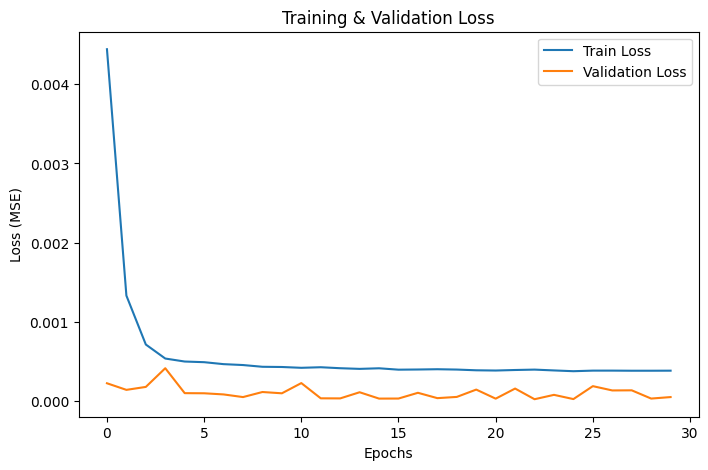

In [73]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [74]:
import joblib
import tensorflow as tf
# Save trained model
model.save("model.h5")

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']